## 1. Exploratory Data Analysis

The focus of this exploration is to analyce & predict and segment the customer behavior to develop a customer retention/loyalty program

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**The data set includes information about:**

- Customers who left within the last month – the column is called Churn

- Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

- Customer account information – how long they’ve been a customer, contract, payment method, paperless 
billing, monthly charges, and total charges

- Demographic info about customers – gender, age range, and if they have partners and dependents


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [5]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
# ensuring MonthlyCharges is numeric, as well as TotalCharges
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

#converting SeniorCitizen to categorical
df['SeniorCitizen'] = df['SeniorCitizen'].astype('object')

In [8]:
target_variable = 'Churn'

numeric_variables = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges'
]

categorical_variables = [
    'gender',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod',
    'Churn',
    'SeniorCitizen'
]


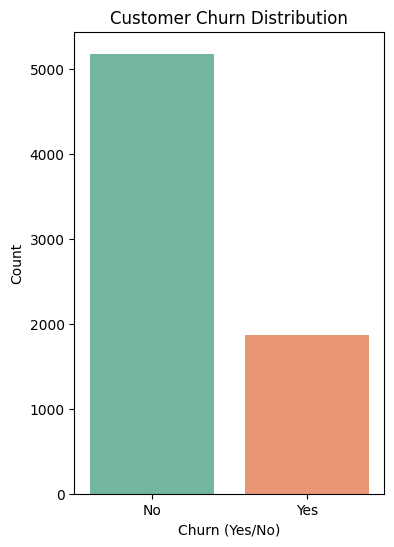

In [9]:
# Visualizing the "target" Class distribution
plt.figure(figsize=(4, 6))
sns.countplot(x=target_variable, data=df, hue=target_variable, palette='Set2')
plt.title('Customer Churn Distribution')
plt.xlabel('Churn (Yes/No)')
plt.ylabel('Count')
plt.savefig('churn_distribution.png')
plt.show()

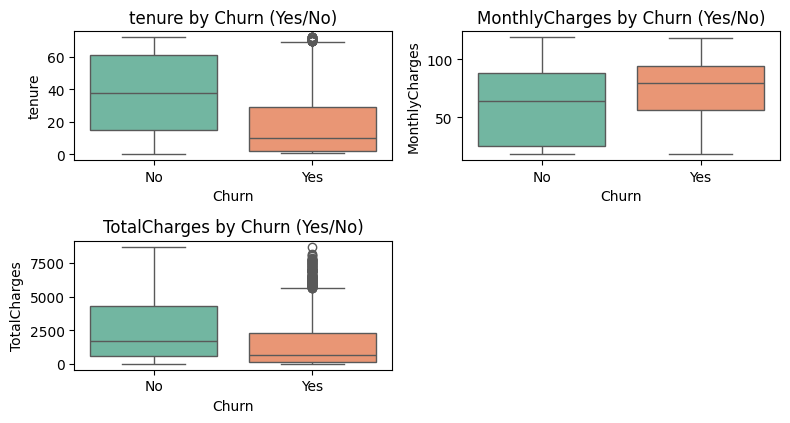

In [10]:
# Numeric feature distributions by class
plt.figure(figsize=(8, 6))
for i, col in enumerate(numeric_variables, 1):
    plt.subplot(3, 2, i)
    sns.boxplot(x=target_variable, y=col, data=df, hue='Churn', palette='Set2')
    plt.title(f'{col} by Churn (Yes/No)')
plt.tight_layout()
plt.savefig('numeric_box_plots.png')
plt.show()

- Logically, those clients who have been more time with the company, are more likely to not leave or cancel the contract

- We can also see that those clients who do abandon the company, tend to pay 60-100 dollars each month

- When it comes to the total charges paid by the customer, it is more difficult to see which customers churn based on that, since a good cuantity of them (outliers) pay the biggest charges whereas other portion of customers who also churn pay even smaller tariffs than whose who do not churn

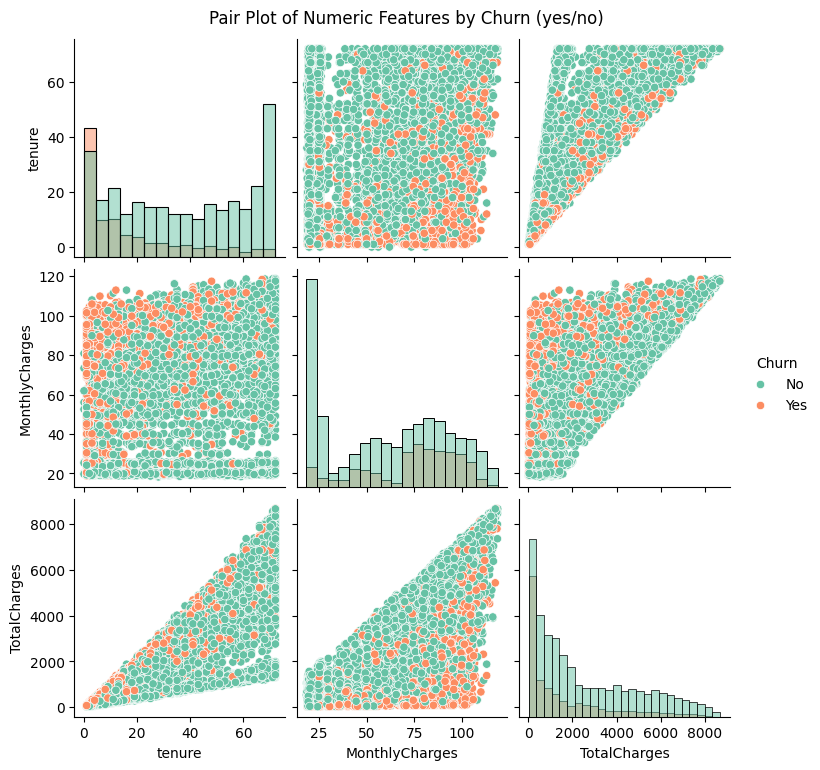

In [11]:
# Pair plot for key features
#we can only do pairplots for numeric features

sns.pairplot(df[numeric_variables + [target_variable]], hue=target_variable, diag_kind='hist', palette="Set2")
plt.suptitle('Pair Plot of Numeric Features by Churn (yes/no)', y=1.02)
plt.savefig('pair_plot.png')
plt.show()

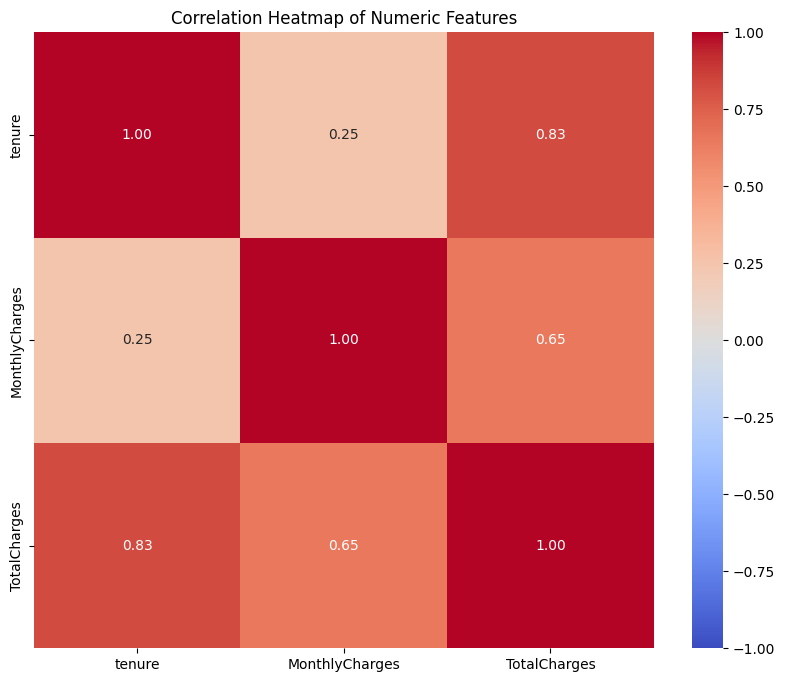

In [12]:
# Correlation heatmap (numeric features)
plt.figure(figsize=(10, 8))
sns.heatmap(df[numeric_variables].corr(), annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numeric Features')
plt.savefig('correlation_heatmap.png')
plt.show();

In [13]:

df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


In [14]:
len(categorical_variables)

17

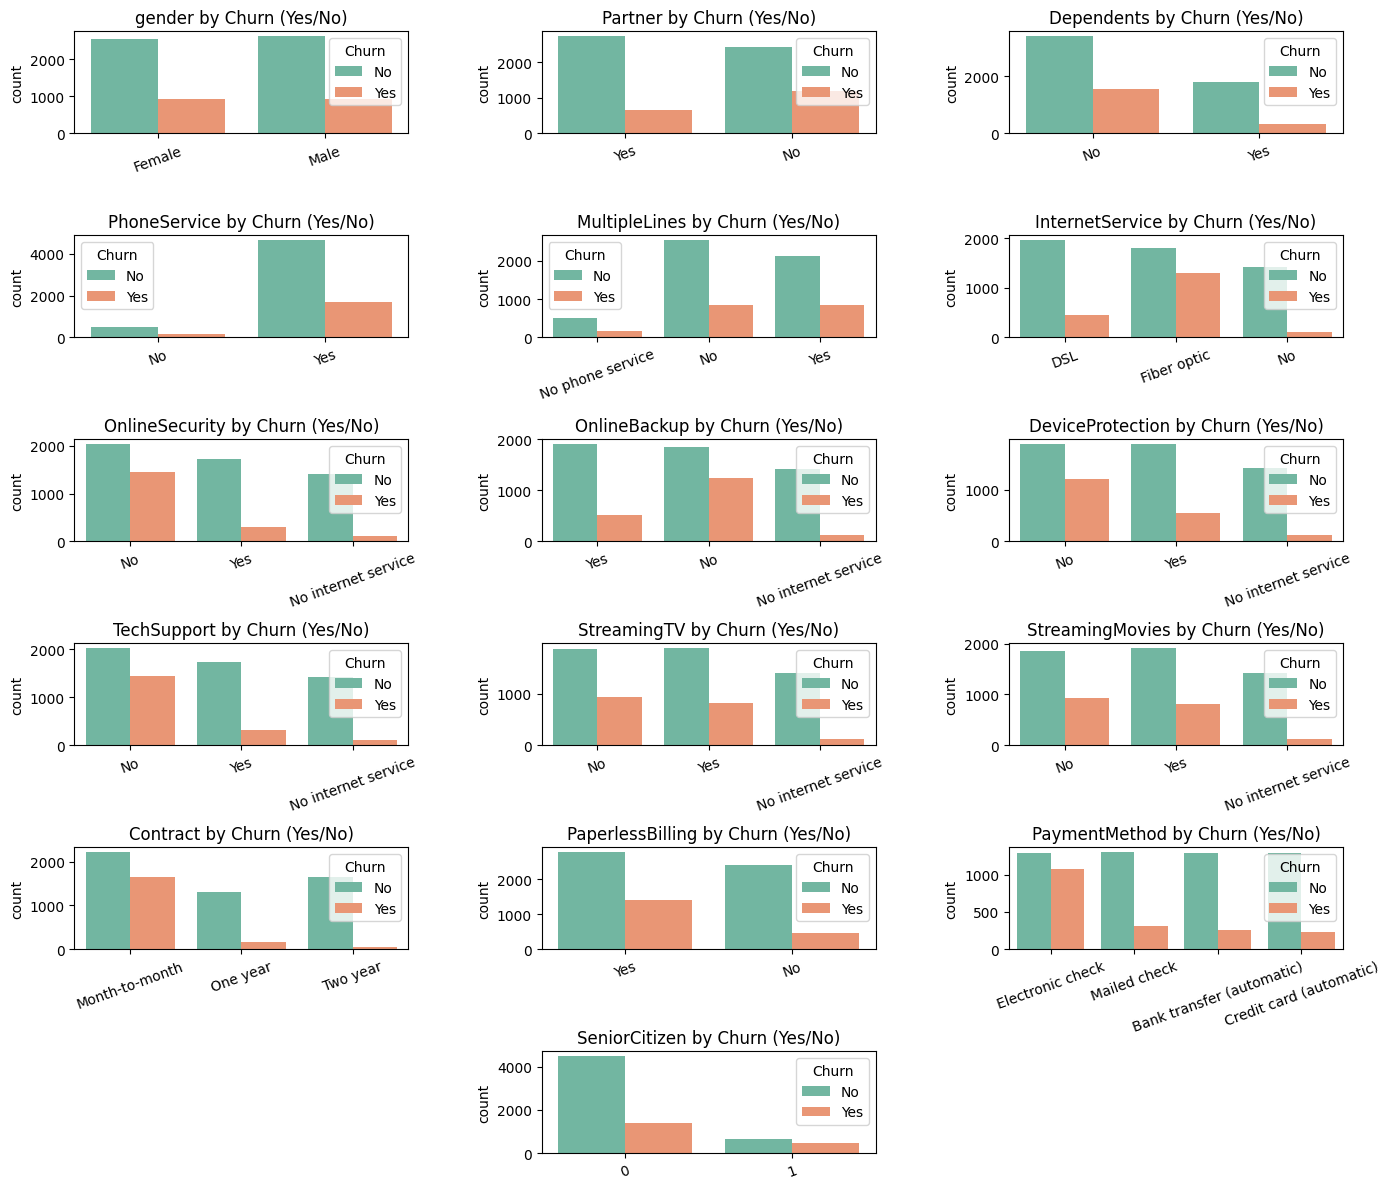

In [15]:
plt.figure(figsize=(14, 12))
for i, col in enumerate(categorical_variables, 1):


    if col != target_variable:
        plt.subplot(6, 3, i) #3*2 plots=6


        sns.countplot(x=col, data=df, hue=target_variable, palette='Set2')
        plt.title(f'{col} by Churn (Yes/No)')
        plt.xlabel("")
        plt.xticks(rotation=20)
        plt.savefig('categorical_distributions.png')

    plt.tight_layout()
    plt.subplots_adjust(wspace=0.4, hspace=1)  # Increase spacing

plt.show()

- Those clients who have `Month-to-month` contract are more likely to churn. 

- On the other hand, clients who use `fiber optic` as internet device are also very prone to churn

- It is also visible that clients who haven't partner or dependents in home tend to also churn more often

## 2. Data preprocessing

- NaNs

- Handling Categorical Data & Imbalanced Classes

- Dealing with Outliers (Capping them or removing them)

In [16]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [17]:
# sns.boxplot(x='TotalCharges', data=df, color='skyblue')

In [18]:
df['TotalCharges'].fillna(int(df['TotalCharges'].mean()), inplace=True)


/var/folders/kx/jw21_sd16q764hqyvx6kx9br0000gn/T/ipykernel_8925/3141228546.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['TotalCharges'].fillna(int(df['TotalCharges'].mean()), inplace=True)


In [19]:
pd.get_dummies(df[categorical_variables], drop_first=True)

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,SeniorCitizen_1
0,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False
1,True,False,False,True,False,False,False,False,False,True,...,False,False,True,False,False,False,False,True,False,False
2,True,False,False,True,False,False,False,False,False,True,...,False,False,False,False,True,False,False,True,True,False
3,True,False,False,False,True,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
4,False,False,False,True,False,False,True,False,False,False,...,False,False,False,False,True,False,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,True,True,True,True,False,True,False,False,False,True,...,False,True,True,False,True,False,False,True,False,False
7039,False,True,True,True,False,True,True,False,False,False,...,False,True,True,False,True,True,False,False,False,False
7040,False,True,True,False,True,False,False,False,False,True,...,False,False,False,False,True,False,True,False,False,False
7041,True,True,False,True,False,True,True,False,False,False,...,False,False,False,False,True,False,False,True,True,True


In [20]:
df.shape

(7043, 21)

In [21]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categorical = encoder.fit_transform(df[categorical_variables])

In [22]:
encoded_categorical 

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 1., 0., 0.],
       [1., 0., 0., ..., 1., 1., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 1., 0., ..., 1., 1., 1.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [23]:
df[target_variable]

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7043, dtype: object

In [24]:
df.drop(columns=categorical_variables, inplace=True)

df = pd.concat([df, pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_variables))], axis=1)

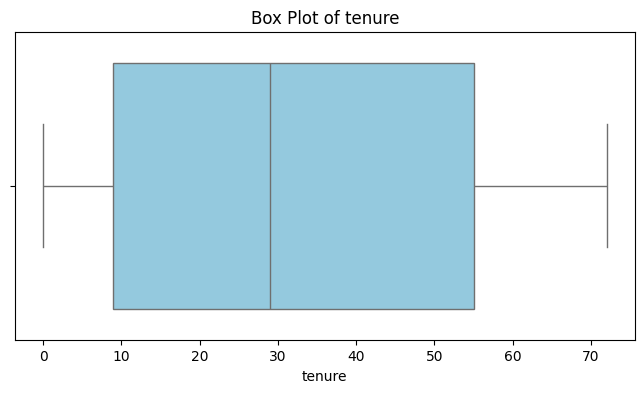

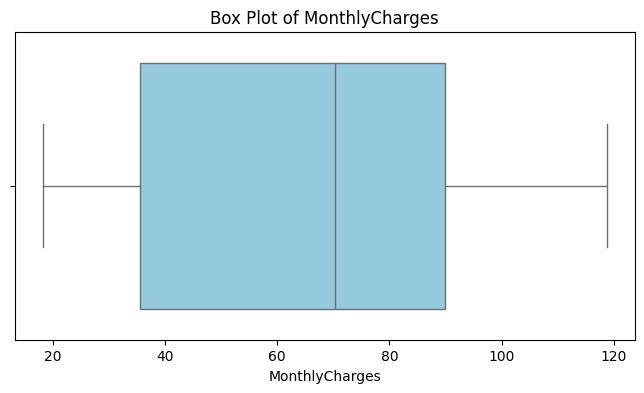

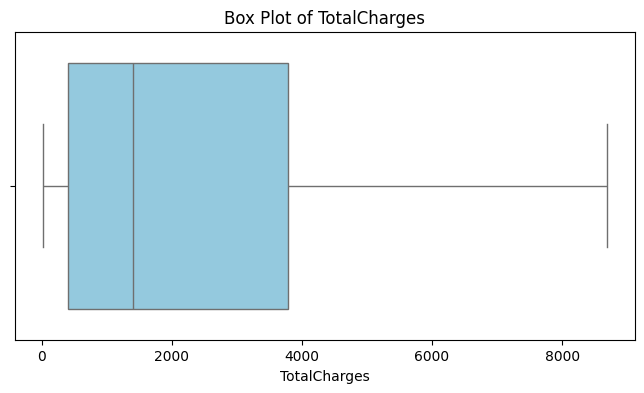

In [25]:
# finding outliers in numeric variables
for col in numeric_variables:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.savefig(f'box_plot_{col}.png')
    plt.show()

In [26]:
df.drop(columns=["customerID"], inplace=True)
# checking for imbalanced classes
df.Churn_Yes.value_counts()

Churn_Yes
0.0    5174
1.0    1869
Name: count, dtype: int64

Since the Churn_Yes class is imbalanced, only representing the 26% of the dataset samples, we'll do `SMOTE` to generate synthetic instances of the minority class

In [27]:
# Train-test split
from sklearn.model_selection import train_test_split

X = df.drop(columns=["Churn_Yes"])
y = df["Churn_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
#stratify ensures the test and training is equally distributed in terms of the target variable

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
from imblearn.over_sampling import SMOTE, SMOTENC

# using SMOTENC instead, to respect categorical features
smote_nc = SMOTENC(categorical_features=[x for x in encoder.get_feature_names_out() if x!="Churn_Yes"], random_state=42)


# smote = SMOTE(random_state=42)

X_train, y_train = smote_nc.fit_resample(X_train, y_train) #we only apply it to training set
#we prevent in that way models like logistic regression to be biased towards the majority class (Introvert:0 in this case)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

/opt/miniconda3/envs/loyalty_env/lib/python3.9/site-packages/sklearn/base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
/opt/miniconda3/envs/loyalty_env/lib/python3.9/site-packages/sklearn/base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(


In [30]:
from collections import Counter
print(Counter(y_train)) 
# balanced now!


Counter({0.0: 4139, 1.0: 4139})


## 3. Feature Engineering

In [31]:
df

,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,SeniorCitizen_1
0,1,29.85,29.85,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,34,56.95,1889.50,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,53.85,108.15,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,45,42.30,1840.75,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,70.70,151.65,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7039,72,103.20,7362.90,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7040,11,29.60,346.45,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7041,4,74.40,306.60,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0


In [32]:
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

In [33]:
X_train

,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen_1
0,35,49.200000,1701.650000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,15,75.100000,1151.550000,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,13,40.550000,590.350000,1.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,26,73.500000,1905.700000,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
4,1,44.550000,44.550000,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8273,9,75.553539,653.771677,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
8274,12,97.665412,1154.482849,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8275,48,96.674244,4722.902106,1.0,0.0,0.0,1.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
8276,2,76.093486,143.471491,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [34]:
from sklearn.preprocessing import PolynomialFeatures

In [35]:
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
poly_features_train = poly.fit_transform(X_train[numeric_variables])

poly_features_test = poly.transform(X_test[numeric_variables])

poly_feature_names = poly.get_feature_names_out(numeric_variables)


X_train[poly_feature_names] = poly_features_train #update train and test features along with new ones
X_test[poly_feature_names] = poly_features_test

In [36]:
poly_feature_names

array(['tenure', 'MonthlyCharges', 'TotalCharges',
       'tenure MonthlyCharges', 'tenure TotalCharges',
       'MonthlyCharges TotalCharges'], dtype=object)

In [37]:
numeric_variables

['tenure', 'MonthlyCharges', 'TotalCharges']

In [38]:
df

,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,...,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,SeniorCitizen_1
0,1,29.85,29.85,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,34,56.95,1889.50,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,2,53.85,108.15,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
3,45,42.30,1840.75,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,70.70,151.65,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7039,72,103.20,7362.90,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
7040,11,29.60,346.45,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7041,4,74.40,306.60,1.0,1.0,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0


_____________

## 4. Model training and evaluation

In [39]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier




In [40]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB


from sklearn.pipeline import Pipeline
import pandas as pd
from scipy.stats import uniform, randint
# from imblearn.combine import SMOTEENN


In [42]:
from tqdm.notebook import tqdm

In [43]:
# Initialize an empty list to store model scores
model_scores = []

# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'max_depth': [None, 10, 20]}),  # Add hyperparameters for Random Forest
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Gradient Boosting
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'C': [0.1, 1, 10],
         'gamma': ['scale', 'auto']}),  # Add hyperparameters for SVM
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'C': [0.1, 1, 10],
         'penalty': ['l1', 'l2']}),  # Add hyperparameters for Logistic Regression
    ('K-Nearest Neighbors', KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7],
         'weights': ['uniform', 'distance']}),  # Add hyperparameters for KNN
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'max_depth': [None, 10, 20],
         'min_samples_split': [2, 5, 10]}),  # Add hyperparameters for Decision Tree
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'n_estimators': [50, 100, 200],
         'learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Ada Boost
    ('XG Boost', XGBClassifier(random_state=42),
        {'max_depth': randint(3, 6), 
         'learning_rate': uniform(0.01, 0.2),  
         'n_estimators': randint(100, 300),  
         'subsample': uniform(0.8, 0.2)}),  # Add hyperparameters for XG Boost
    ('Naive Bayes', GaussianNB(), {})  # No hyperparameters for Naive Bayes
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model, param_grid in tqdm(models):
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using RandomizedSearchCV for XG Boost
    if name == 'XG Boost':
        random_search = RandomizedSearchCV(estimator=model, param_distributions=param_grid,
                                           n_iter=100, cv=3, verbose=0, random_state=42, n_jobs=-1)
        random_search.fit(X_train, y_train)
        pipeline = random_search.best_estimator_
    # Hyperparameter tuning using GridSearchCV for other models
    elif param_grid:
        grid_search = GridSearchCV(model, param_grid, cv=2, verbose=0)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_

    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Append model name and accuracy to the list
    model_scores.append({'Model': name, 'Accuracy': accuracy})

    # Convert the list to a DataFrame
    scores_df = pd.DataFrame(model_scores)

    # Print the performance metrics
    print("Model:", name)

    print(accuracy)
    print("Test Accuracy:", accuracy,"%")
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the overall best model
print("Best Model:")
print("Test Accuracy:", best_accuracy)
print("Model Pipeline:", best_model, "with accuracy", best_accuracy, "%")

  0%|          | 0/9 [00:00<?, ?it/s]

Model: Random Forest
0.7757274662881476
Test Accuracy: 0.7757274662881476 %

Model: Gradient Boosting
0.7636621717530163
Test Accuracy: 0.7636621717530163 %

Model: Support Vector Machine
0.6408800567778566
Test Accuracy: 0.6408800567778566 %

Model: Logistic Regression
0.7033356990773598
Test Accuracy: 0.7033356990773598 %



/opt/miniconda3/envs/loyalty_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/miniconda3/envs/loyalty_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_mode

Model: K-Nearest Neighbors
0.7019162526614621
Test Accuracy: 0.7019162526614621 %

Model: Decision Tree
0.730305180979418
Test Accuracy: 0.730305180979418 %

Model: Ada Boost
0.7480482611781405
Test Accuracy: 0.7480482611781405 %

Model: XG Boost
0.7757274662881476
Test Accuracy: 0.7757274662881476 %

Model: Naive Bayes
0.7111426543647977
Test Accuracy: 0.7111426543647977 %

Best Model:
Test Accuracy: 0.7757274662881476
Model Pipeline: RandomForestClassifier(n_estimators=200, random_state=42) with accuracy 0.7757274662881476 %


In [44]:
best_accuracy

0.7757274662881476

/var/folders/kx/jw21_sd16q764hqyvx6kx9br0000gn/T/ipykernel_8925/3306134579.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Model', y='Accuracy', data=scores_df, palette=colors)


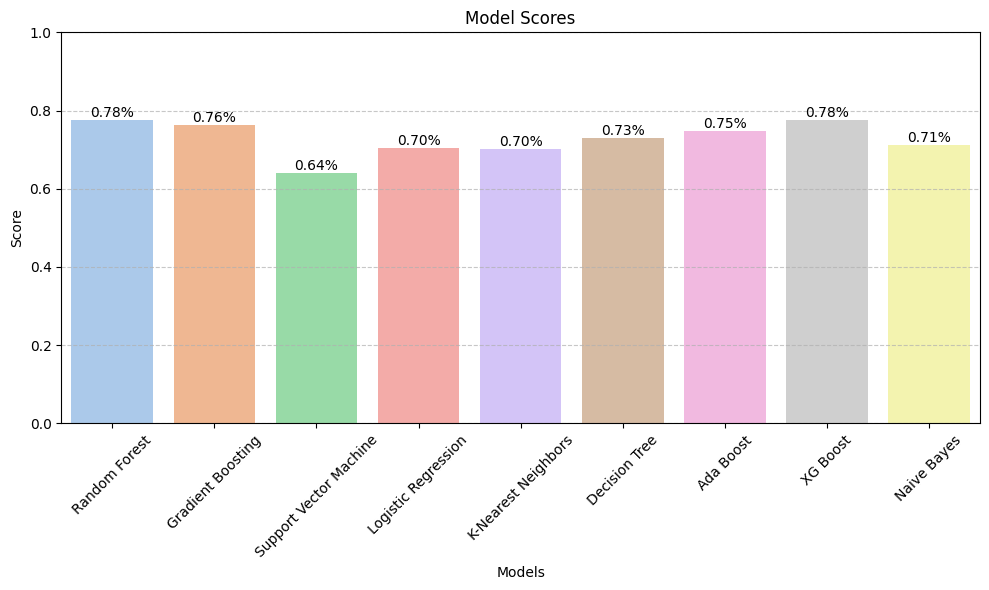

In [45]:
# Define a color palette for the bars
colors = sns.color_palette('pastel', n_colors=len(scores_df))

# Create a bar plot of models and their scores
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='Accuracy', data=scores_df, palette=colors)

# Add text on each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), 
                textcoords='offset points')

plt.title('Model Scores')
plt.xlabel('Models')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

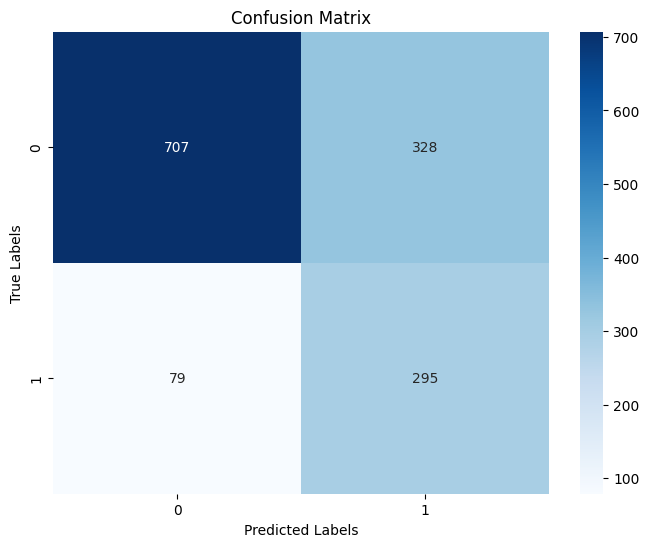

In [47]:
from sklearn.metrics import confusion_matrix


# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=True)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [50]:
model_scores

[{'Model': 'Random Forest', 'Accuracy': 0.7757274662881476},
 {'Model': 'Gradient Boosting', 'Accuracy': 0.7636621717530163},
 {'Model': 'Support Vector Machine', 'Accuracy': 0.6408800567778566},
 {'Model': 'Logistic Regression', 'Accuracy': 0.7033356990773598},
 {'Model': 'K-Nearest Neighbors', 'Accuracy': 0.7019162526614621},
 {'Model': 'Decision Tree', 'Accuracy': 0.730305180979418},
 {'Model': 'Ada Boost', 'Accuracy': 0.7480482611781405},
 {'Model': 'XG Boost', 'Accuracy': 0.7757274662881476},
 {'Model': 'Naive Bayes', 'Accuracy': 0.7111426543647977}]

- Precision: *“Of all the items the model labeled as positive, how many were actually positive?”*

- Recall: *Of all the actual positives, how many did the model correctly identify?*

- F1-Score: *Mean of precission and recall*

In [ ]:
pipeline

Pipeline(steps=[('scaler', MinMaxScaler()), ('model', GaussianNB())])

In [54]:

# Evaluate on test set
y_pred = pipeline.predict(X_test)
print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))

              precision    recall  f1-score   support

    No Churn       0.90      0.68      0.78      1035
       Churn       0.47      0.79      0.59       374

    accuracy                           0.71      1409
   macro avg       0.69      0.74      0.68      1409
weighted avg       0.79      0.71      0.73      1409



In [ ]:
# save model
import joblib
joblib.dump(pipeline, 'best_model.pkl')

['best_model.pkl']